# Predict 5



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('slr.csv')
df.head(10)

,Time,SLR
0,1/1/2015,-44.91
1,1/2/2015,-43.98
2,1/3/2015,-59.59
3,1/4/2015,-75.15
4,1/5/2015,-66.60
5,1/6/2015,-34.48
6,1/7/2015,-50.09
7,1/8/2015,-53.09
8,1/9/2015,-85.74
9,1/10/2015,-83.24


Melihat informasi singkat dari dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1425 non-null   object 
 1   SLR     1425 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.4+ KB


Dari informasi singkat di atas, kita dapat mengetahui bahwa df terdiri dari 1409 baris.
Selain itu, pada kolom Datetime, tipe datanya masih berupa object (String) sehingga perlu diubah menjadi tipe data datetime dengan cara berikut.

In [ ]:
# merubah tipe data object to datetime
df['Time'] = df['Time'].astype('datetime64[ns]')

# melihat tipe data dataframe
print(df.dtypes)


Time    datetime64[ns]
SLR            float64
dtype: object


In [ ]:
df.head(30)

,Time,SLR
0,2015-01-01,-44.91
1,2015-01-02,-43.98
2,2015-01-03,-59.59
3,2015-01-04,-75.15
4,2015-01-05,-66.60
5,2015-01-06,-34.48
6,2015-01-07,-50.09
7,2015-01-08,-53.09
8,2015-01-09,-85.74
9,2015-01-10,-83.24


In [ ]:
print('waktu terawal dari kolom Datetime adalah:', df['Time'].min())
df.head()

waktu terawal dari kolom Datetime adalah: 2015-01-01 00:00:00


,Time,SLR
0,2015-01-01,-44.91
1,2015-01-02,-43.98
2,2015-01-03,-59.59
3,2015-01-04,-75.15
4,2015-01-05,-66.60


In [ ]:
# mengurutkan data berdasarkan waktu
df.sort_values('Time', inplace=True, ignore_index=True)
df.head()

,Time,SLR
0,2015-01-01,-44.91
1,2015-01-02,-43.98
2,2015-01-03,-59.59
3,2015-01-04,-75.15
4,2015-01-05,-66.60


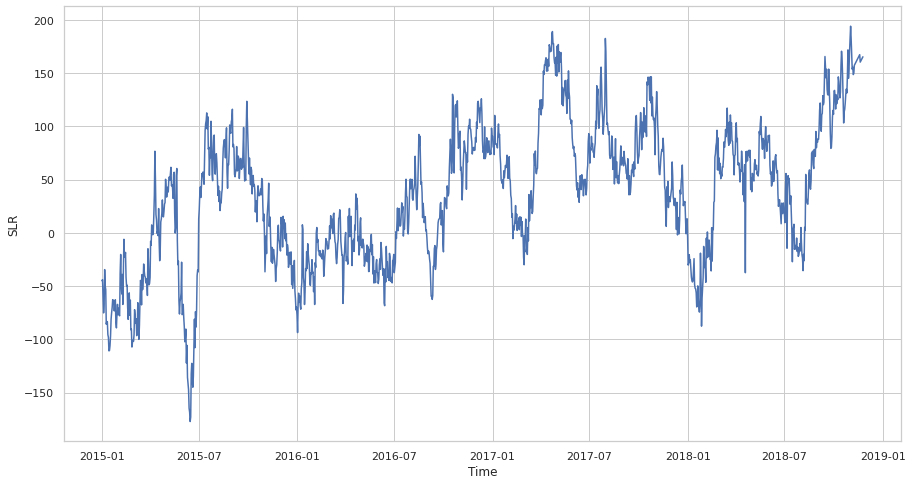

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='Time', y='SLR')


Memilih Data Setahun Terakhir
Pada contoh ini kita hanya akan gunakan data setahun terakhir dari data SLR
Karena data yang diobservasi per HARI, maka kita akan mengambil Sample sebanyak 365 baris terakhir dari df dan dimasukan kedalam variabel df1


In [ ]:
df1 = df[-2*365:].reset_index(drop=True)
df1.head()

,Time,SLR
0,2016-11-26,77.68
1,2016-11-27,80.33
2,2016-11-28,77.45
3,2016-11-29,77.87
4,2016-11-30,89.60


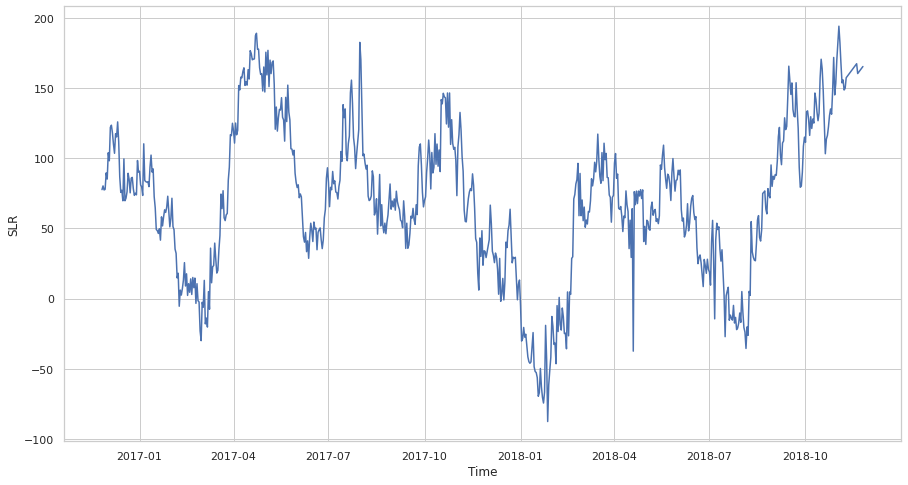

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df1, x='Time', y='SLR')

Melihat Statistika Deskriptif dari Data
Sebelum melakukan pembuatan model, sebaiknya dilakukan analisa terhadap statistika deskriptif dari data
Dari statistika deskriptif tersebut, kita dapat meilhat range dari data dan ukuran pusat data


In [ ]:
df1.describe()


,SLR
count,730.000000
mean,70.837164
std,54.807510
min,-87.570000
25%,37.775000
50%,71.875000
75%,106.740000
max,194.140000


Dari statistika deskriptif di atas terlihat bahwa data SLR minus dan berada pada range-87 dan 194 sehingga nanti kita akan lakukan feature scalling menggunakan MinMaxScaler agar range dari seluruh data tersebut berada di antara 0 dan 1


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result=seasonal_decompose(df['SLR'], model='additive', period=365)

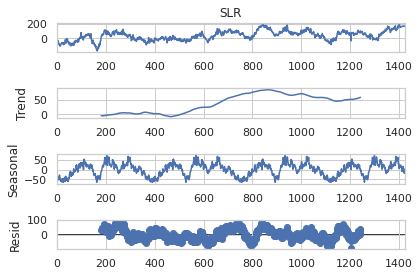

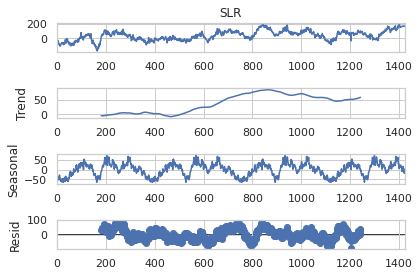

In [ ]:
result.plot()

bisa kita lihat bahwa data memiiki tingakat seasonal yang tinggi dan berulang dengan trend yang relativ sama

In [ ]:
def dickey_fuller(series,title='Your Dataset'):
    '''Hypothesis Test for stationarity '''
    print(f'Augmented Dickey Fuller Test for the dataset {title}')
    
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags','#observations'] # use help(adfuller) to understand why these labels are chosen
    
    outcome = pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        outcome[f'critical value ({key})'] = val
        
    print(outcome.to_string()) # this will not print the line 'dtype:float64'
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis') # Ho is Data is not stationary, check help(adfuller)
        print('Reject the null hypothesis')
        print('Data is Stationary')
    else:
        print('Weak evidence against the Null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non stationary')

In [ ]:
dickey_fuller(df['SLR'],title='SLR')

Augmented Dickey Fuller Test for the dataset SLR
ADF test statistics       -3.839301
p-value                    0.002530
#lags                     22.000000
#observations           1402.000000
critical value (1%)       -3.435023
critical value (5%)       -2.863604
critical value (10%)      -2.567869
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


Kita lihat data yang akan ddigunakan untuk pemodelan sudah stasioner, maka dari itu data aman untuk dilanjutnkan ke proses modeling

#Check Stasionaritas sangat penting untuk melakukan forcasting dan merupakan kewajiban utama sebelum melakukan modeling untuk mengetahui apakah data stassioner atau tidak

### Split Data


Split data dilakukan agar model yang telah dilatih dapat dievaluasi kemampuannya.
Karena data yang digunakan adalah data time series, maka split data tidak dilakukan secara acak
Kita juga akan melakukan cross validation menggunakan data train sehingga pastikan data train yang digunakan cukup besar.
Pada contoh ini kita gunakan 70% baris pertama sebagai data train dan 30% sisanya sebagai data test.

In [ ]:
# split data
train_size = int(len(df1) * 0.7) # Menentukan banyaknya data train yaitu sebesar 70% data
train = df1[:train_size]
test =df1[train_size:].reset_index(drop=True)

Feature Scalling Menggunakan MinMaxScaler
MinMaxScaler difit pada data train agar dapat digunakan kembali pada data test maupun data observasi baru.
Hasil scalling disimpan pada kolom baru yaitu 'scaled'


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['SLR']])

train['scaled'] = scaler.transform(train[['SLR']])
test['scaled'] = scaler.transform(test[['SLR']])

Mari kita lihat 5 data pertama pada data train untuk melihat data yang sudah discalling

In [ ]:
train.head()

,Time,SLR,scaled
0,2016-11-26,77.68,0.597304
1,2016-11-27,80.33,0.606882
2,2016-11-28,77.45,0.596472
3,2016-11-29,77.87,0.597990
4,2016-11-30,89.60,0.640389


Membuat fungsi sliding window
Selanjutnya kita akan membuat fungsi sliding window dengan input data (bertipe data numpy array) dan window size
Fungsi ini akan menghasilkan variabel input (X) dan variabel target (y)

In [ ]:
def sliding_window(data, window_size):
    sub_seq, next_values = [], []
    for i in range(len(data)-window_size):
        sub_seq.append(data[i:i+window_size])
        next_values.append(data[i+window_size])
    X = np.stack(sub_seq)
    y = np.array(next_values)
    return X,y


Berapa window size yang tepat untuk digunakan?
Pada penerapannya kita dapat menentukan window size berapa saja.
Untuk mencapai hasil yang maksimal dapat dilakukan percobaan dengan menggunakan beberapa window size.
Perlu diperhatikan juga bahwa semakin** besar window size **yang digunakan akan memerlukan waktu yang cukup lama dalam proses training data
Pada contoh ini kita hanya menggunakan window size = 24 atau sama dengan 1 hari dan kita terapkan pada data train dan test yang telah discalling

In [ ]:
window_size = 24

X_train, y_train = sliding_window(train[['scaled']].values, window_size)
X_test, y_test = sliding_window(test[['scaled']].values, window_size)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(486, 24, 1) (486, 1)
(196, 24, 1) (196, 1)


Penting!!!
Data input LSTM harus 3D : [samples, timesteps, feature]


## LSTM menggunakan Tensorflow dan Keras


Untuk membuat LSTM() layer menggunakan Keras, perhatikan parameter-parameter berikut untuk membuat LSTM layer sederhana, ada beberapa parameter yaitu 


*   units: menentukan banyaknya LSTM unit
*   input_shape: menentukan ukuran timesteps dan feature, diperlukan pada layer pertama
*   return_sequences: jika layer berikutnya berupa LSTM layer maka return_sequences=True (default = False)

# Membuat Model Forecasting Menggunakan LSTM

Untuk menggunakan arsitektur GRU, ganti model LSTM dengan RNN atau GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM #, RNN, GRU 

# 2. Membuat Fungsi Model Forecasting Menggunakan LSTM
Fungsi model yang akan dibuat terdiri:

LSTM layer dengan 
* input_shape = (window_size, 1)
* Dense layer dengan 32 neuron dengan fungsi aktivasi ReLu
* Dropout antara Dense layer dan Dense output layer
* Dense output layer dengan 1 neuron
* loss function yang digunakan adalah Mean Squared Error (MSE)
* optimizer yang digunakan adalah adam
* metric yang digunakan adalah Mean Absolute Error (MAE)

* Parameter-parameter yang dijadikan sebagai input dari fungsi tersebut adalah:
  - LSTM_unit: banyaknya LSTM unit (default = 64)
  - dropout: persentase dropout (default = 0.2)

In [ ]:
def create_model(LSTM_unit=64, dropout=0.2): #jika ingin menggunakan RNN atau GRU ganti LSTM dengan GRU/RNN
    # create model
    model = Sequential()
    model.add(LSTM(units=LSTM_unit, input_shape=(window_size, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

#3. Membuat Model
Kita coba lakukan hypertuning pada parameter, dengan mencoba kombinasi nilai LSTM unitnya 16,32,64,28 dan peluang dropout 0,1 dan 0,2



In [ ]:
LSTM_unit = [16,32,64,128]
dropout = [0.1,0.2]


Selain itu, kita juga gunakan early stopping pada saat proses training



In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
# Early Stopping
es = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5, verbose = 0)

# create model
model = KerasRegressor(build_fn=create_model, epochs=50, validation_split=0.1, batch_size=32, callbacks=[es], verbose=1)

# define the grid search parameters
LSTM_unit = [16,32,64,128]
dropout=[0.1,0.2]
param_grid = dict(LSTM_unit=LSTM_unit, dropout=dropout)

# 4. Membuat Variabel GridSearchCV
Variabel GridSearchCV dibuat dengan memasukan beberapa parameter yaitu:
- estimator: model yang ingin dilakukan gridsearch
- param_grid: parameter yang ingin diuji
- n_jobs: Jumlah pekerjaan untuk dijalankan secara paralel. (-1 artinya menggunakan seluruh core processor)
- cv: banyaknya k-fold cross validation

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

In [ ]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/50
14/14 [==============================] - 3s 54ms/step - loss: 0.2511 - mae: 0.4500 - val_loss: 0.0656 - val_mae: 0.2472
Epoch 2/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0373 - mae: 0.1564 - val_loss: 0.0161 - val_mae: 0.1002
Epoch 3/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0209 - mae: 0.1167 - val_loss: 0.0104 - val_mae: 0.0816
Epoch 4/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0204 - mae: 0.1092 - val_loss: 0.0061 - val_mae: 0.0550
Epoch 5/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0140 - mae: 0.0966 - val_loss: 0.0060 - val_mae: 0.0545
Epoch 6/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0130 - mae: 0.0894 - val_loss: 0.0058 - val_mae: 0.0542
Epoch 7/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0119 - mae: 0.0864 - val_loss: 0.0057 - val_mae: 0.0543
Epoch 8/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0117 - m

Mengecek hasil parametrik

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Mengambil model terbaik
best_model = grid_result.best_estimator_.model

Best: -0.005133 using {'LSTM_unit': 32, 'dropout': 0.1}
-0.005444 (0.002569) with: {'LSTM_unit': 16, 'dropout': 0.1}
-0.005925 (0.002319) with: {'LSTM_unit': 16, 'dropout': 0.2}
-0.005133 (0.002019) with: {'LSTM_unit': 32, 'dropout': 0.1}
-0.005428 (0.002141) with: {'LSTM_unit': 32, 'dropout': 0.2}
-0.005575 (0.001969) with: {'LSTM_unit': 64, 'dropout': 0.1}
-0.005539 (0.002028) with: {'LSTM_unit': 64, 'dropout': 0.2}
-0.006406 (0.002156) with: {'LSTM_unit': 128, 'dropout': 0.1}
-0.006892 (0.001296) with: {'LSTM_unit': 128, 'dropout': 0.2}


Dari Hasil Training menggunakan GridSearchCV, kita peroleh:

parameter terbaiknya adalah: {'LSTM_unit': 64, 'dropout': 0.1}
Rata-rata Loss Function dari hasil Cross Validation adalah 0.000353
Kemudian coba kita lihat grafik loss function MSE dan metric MAE terhadap epoch untuk melihat performa model terbaik kita dengan cara sebagai berikut

Kita dapat melihat grafik loss function MSE dan metric MAE terhadap epoch untuk melihat performa model kita dengan cara sebagai berikut


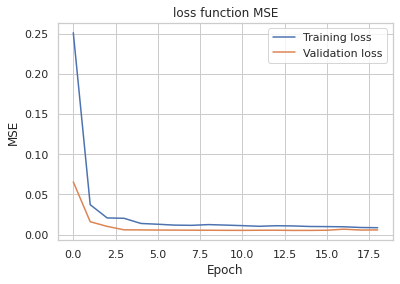

In [ ]:
history = best_model.history
# grafik loss function MSE

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

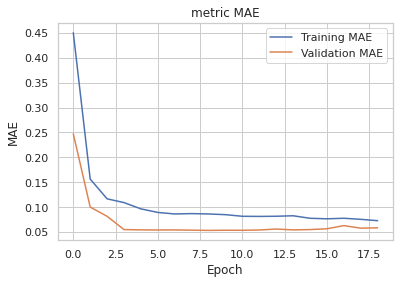

In [ ]:
# grafik metric MAE

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('metric MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

# Model Evaluaation

In [ ]:
# Prediksi data train
predict_train = scaler.inverse_transform(best_model.predict(X_train))
true_train = scaler.inverse_transform(y_train)

# Prediksi data test
predict_test = scaler.inverse_transform(best_model.predict(X_test))
true_test = scaler.inverse_transform(y_test)

7/7 [==============================] - 0s 5ms/step


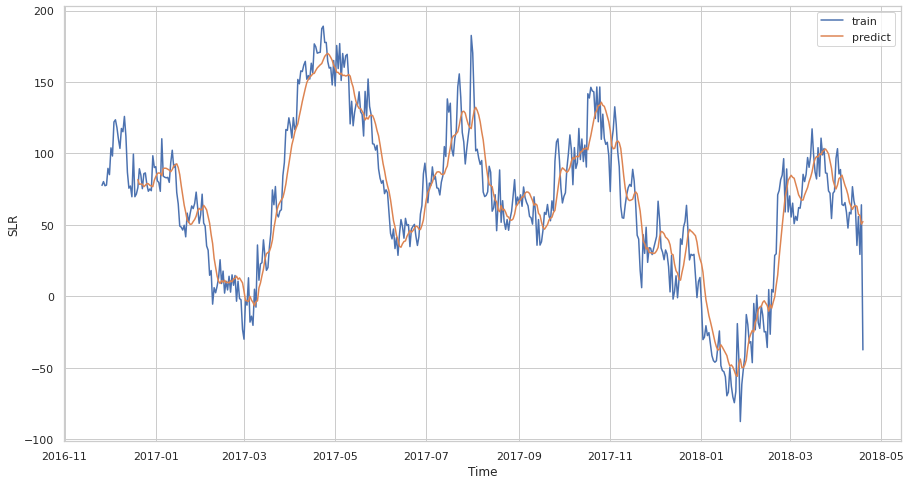

In [ ]:
train['predict'] = np.nan
train['predict'][-len(predict_train):] = predict_train[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=train, x='Time', y='SLR', label = 'train')
sns.lineplot(data=train, x='Time', y='predict', label = 'predict')

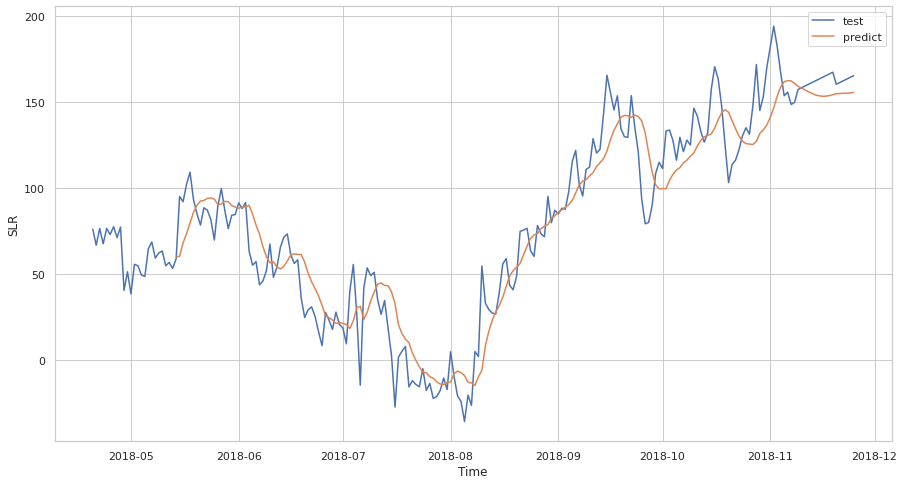

In [ ]:
# pLOT PREDIKSI DATSET

test['predict'] = np.nan
test['predict'][-len(predict_test):] = predict_test[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=test, x='Time', y='SLR', label = 'test')
sns.lineplot(data=test, x='Time', y='predict', label = 'predict')

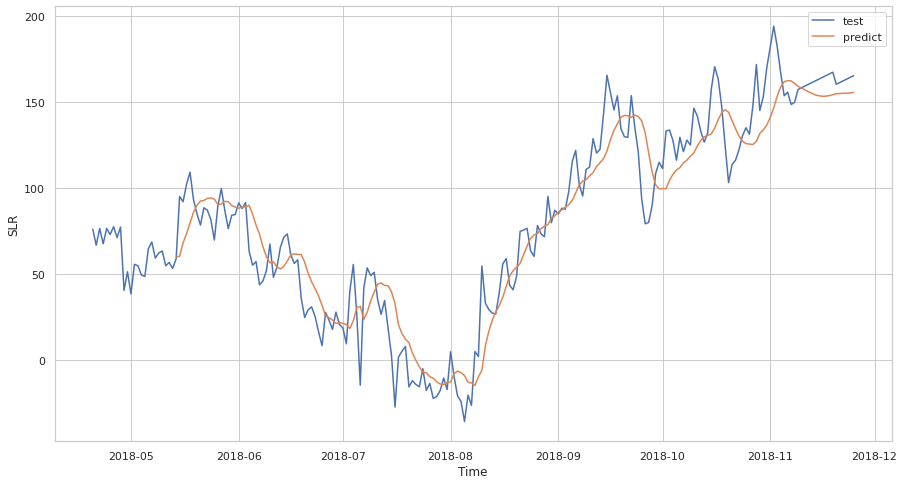

In [ ]:
#Plot prediksi sebulan terakhir
plt.figure(figsize=(15,8))
sns.lineplot(data=test[-24*30:], x='Time', y='SLR', label = 'test')
sns.lineplot(data=test[-24*30:], x='Time', y='predict', label = 'predict')


In [ ]:
# forecasting data selanjutnya
y_test = scaler.transform(test[['SLR']])
n_future = 24*7
future = [[y_test[-1,0]]]
X_new = y_test[-window_size:,0].tolist()

for i in range(n_future):
    y_future = best_model.predict(np.array([X_new]).reshape(1,window_size,1))
    future.append([y_future[0,0]])
    X_new = X_new[1:]
    X_new.append(y_future[0,0])

future = scaler.inverse_transform(np.array(future))
date_future = pd.date_range(start=test['Time'].values[-1], periods=n_future+1, freq='H')
# Plot Data sebulan terakhir dan seminggu ke depan
plt.figure(figsize=(15,8))
sns.lineplot(data=test[-24*30:], x='Time', y='SLR', label = 'test')
sns.lineplot(data=test[-24*30:], x='Time', y='predict', label = 'predict')
sns.lineplot(x=date_future, y=future[:,0], label = 'future')
plt.ylabel('SLR');
